In [1]:
IRdisplay::display_html("
<style>
.output_png {
        display: table-cell;
        text-align: center;
        vertical-align: middle;
    }
</style>")

# Agrupamiento con *kmeans*

El agrupamiento de observaciones consiste en técnicas de minería de datos para identificar grupos de observaciones o sujetos similares, para esto se utilizan características del conjunto de datos a trabajar. Este tipo de técnicas corresponde a *aprendizaje no supervisado*.

La similitud entre observaciones (o individuos) se define utilizando algunas medidas de distancia entre observaciones, incluidas medidas de distancia euclidianas y basadas en correlaciones.

Existen diferentes tipos de técnicas de agrupación de datos:
- kmeans: Subdividir en $k$ grupos el conjunto de datos.
- dendogramas: Enfoques de agrupamiento jerárquico, que identifican grupos en los datos sin subdividirlos.


In [3]:
library(ggpubr)
library(factoextra)
library(cluster)

In [4]:
columns = c("area", "perimeter", "compactness", "length", "width", "AC", "lengthGroove", "class")
url = "https://www.dl.dropboxusercontent.com/s/wrexlo5im3g5ioi/seeds_dataset.csv"
seeds = read.csv(url, header = F, sep=",", col.names = columns)
seeds$class = factor(seeds$class, levels = c(1,2,3), labels = c("Kama", "Rosa", "Canadian"))

Generalmente para realizar clustering, es necesario escalar los datos. Esto debido a estar ocupando una misma "regla" en las mediciones. Los métodos más conocidos para escalar los datos son:
- Normalización
- Transformación usando cuantiles
- Entre otros

In [5]:
seeds.scaled = scale(seeds[c(1:7)])

La idea del clustering es poder encontrar las observaciones más similares entre sí, es por esto que se debe calcular la distancia entre cada una una de las observaciones. Las distancias más conocidas son:
- Euclediana
- Manhattan
- Minkowski


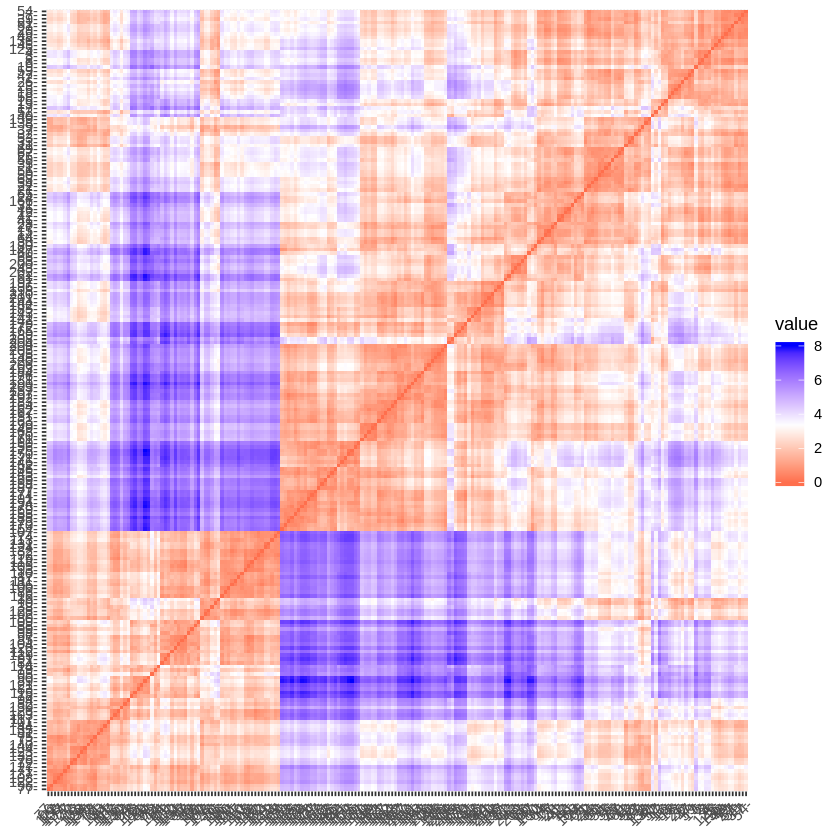

In [6]:
dist.eucl = dist(seeds.scaled, method = "euclidean")

fviz_dist(dist.eucl)

El punto inicial de kmeans es definir un número k de grupos a formar. Para esto, existen distintas formas de encontrar un k a trabajar:

- Método del codo.
- Método de la silueta.
- Metodo de brecha estadística.


**Ojo, pestaña, ceja:** el k no debe ser estrictamente igual a la cantidad de clases, agrupamiento es aprendizaje no supervisado.

Es probable que los métodos lleguen a distintas conclusiones, todo depende del problema a trabajar. Más información [aquí](https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/).

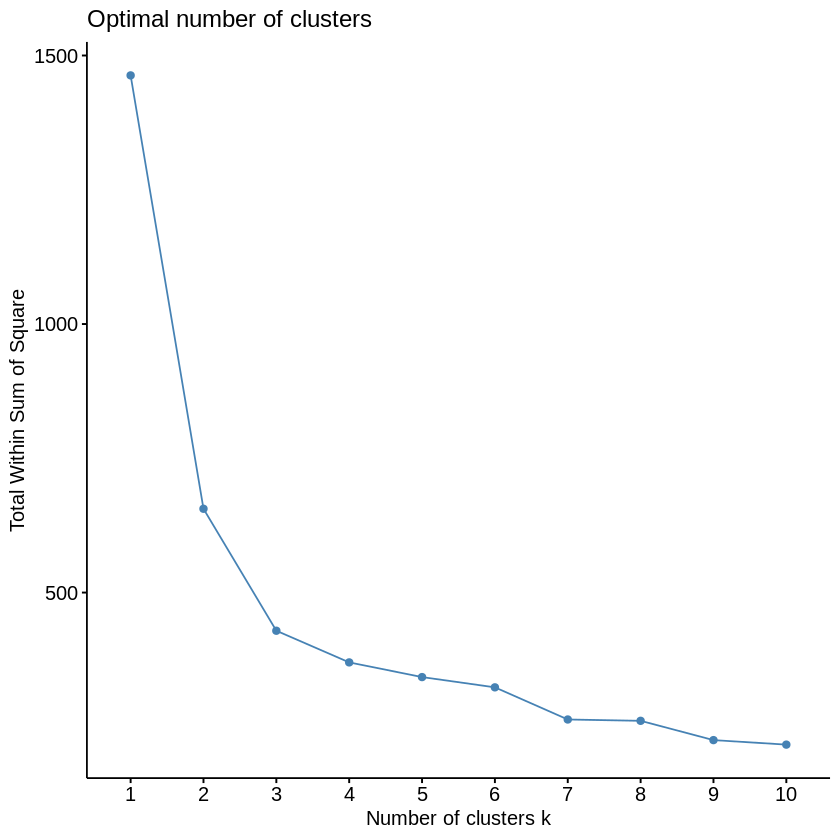

In [7]:
fviz_nbclust(seeds.scaled, kmeans, method = "wss")

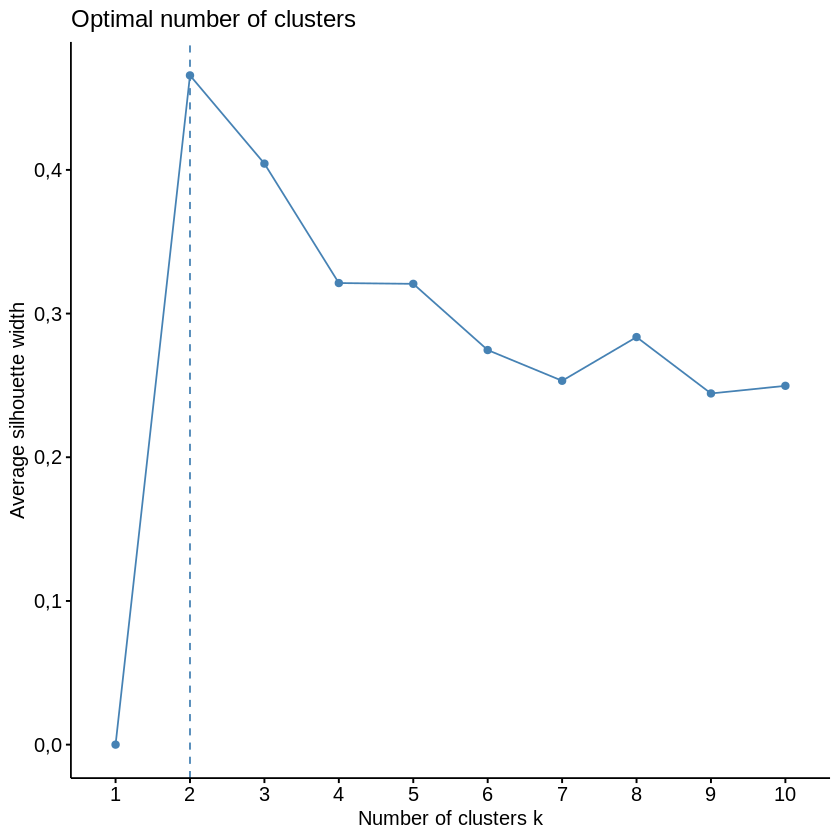

In [8]:
fviz_nbclust(seeds.scaled, kmeans, method = "silhouette")

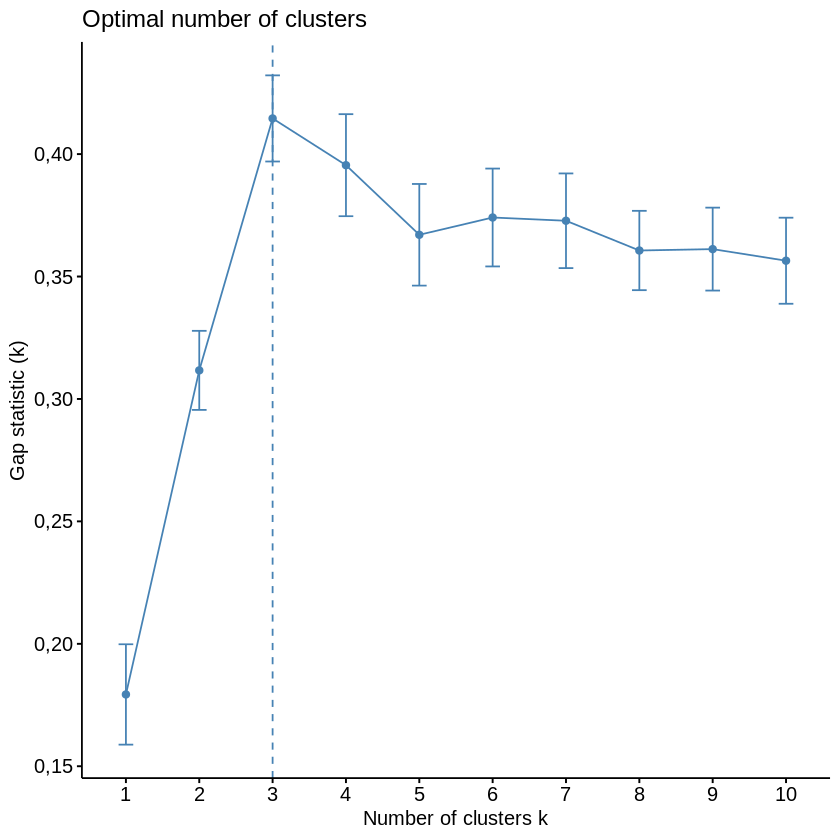

In [9]:
fviz_nbclust(seeds.scaled, kmeans, method = "gap_stat")

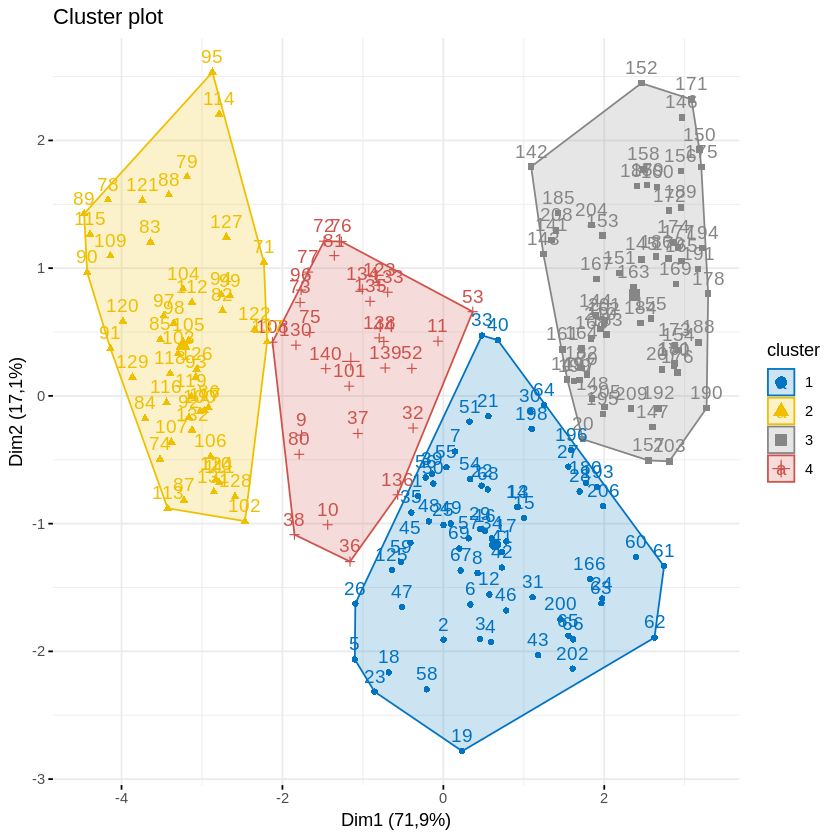

In [22]:
set.seed(99999)

km.res = kmeans(seeds.scaled, 4, nstart = 25)
fviz_cluster(km.res, data = seeds.scaled, palette = "jco", ggtheme = theme_minimal())

Con el k definido, solo queda visualizar los clusters...

Inicializacion
![image1](https://www.iartificial.net/wp-content/uploads/2020/01/kmeans-inicializacion.webp)

Asignacion
![image2](https://www.iartificial.net/wp-content/uploads/2020/01/kmeans-asignacion-1.webp)

Actualizacion
![image3](https://www.iartificial.net/wp-content/uploads/2020/01/kmeans-actualizacion-1.webp)

In [23]:
km.res

K-means clustering with 4 clusters of sizes 67, 50, 64, 29

Cluster means:
        area  perimeter compactness     length      width         AC
1 -0,3070230 -0,3547704   0,4252830 -0,4579962 -0,1342528 -0,7362269
2  1,4562591  1,4440841   0,6569535  1,4361072  1,3399414 -0,1504173
3 -1,0395808 -1,0039833  -1,0701098 -0,8742446 -1,1238527  0,8339509
4  0,4927847  0,5455291   0,2463928  0,5114495  0,4801531  0,1198347
  lengthGroove
1   -0,7811544
2    1,4541952
3   -0,5660058
4    0,5466193

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 4 4 4 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 4 4
 [38] 4 1 1 1 1 1 4 1 1 1 1 1 1 1 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 2 4 4 2
 [75] 4 4 4 2 2 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 4 2 2 2 2 2 2 4 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 4 2 1 2 2 2 2 4 2 2 4 4 4 4 2 4 4 4 3 3 3 3 3 3 3 3
[149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3
[186] 3 3 3 3 3 3 3 1 3 3 1 3 1 3 1 3 1 3 3 3 1 3 3 3 3

Within cluster sum of square

In [24]:
km.res$cluster

[1] 1 1 1 1 1 1 1 1 4 4 4 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 4 4
 [38] 4 1 1 1 1 1 4 1 1 1 1 1 1 1 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 2 4 4 2
 [75] 4 4 4 2 2 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 4 2 2 2 2 2 2 4 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 4 2 1 2 2 2 2 4 2 2 4 4 4 4 2 4 4 4 3 3 3 3 3 3 3 3
[149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3
[186] 3 3 3 3 3 3 3 1 3 3 1 3 1 3 1 3 1 3 3 3 1 3 3 3 3

In [27]:
seeds$km.eucl = km.res$cluster

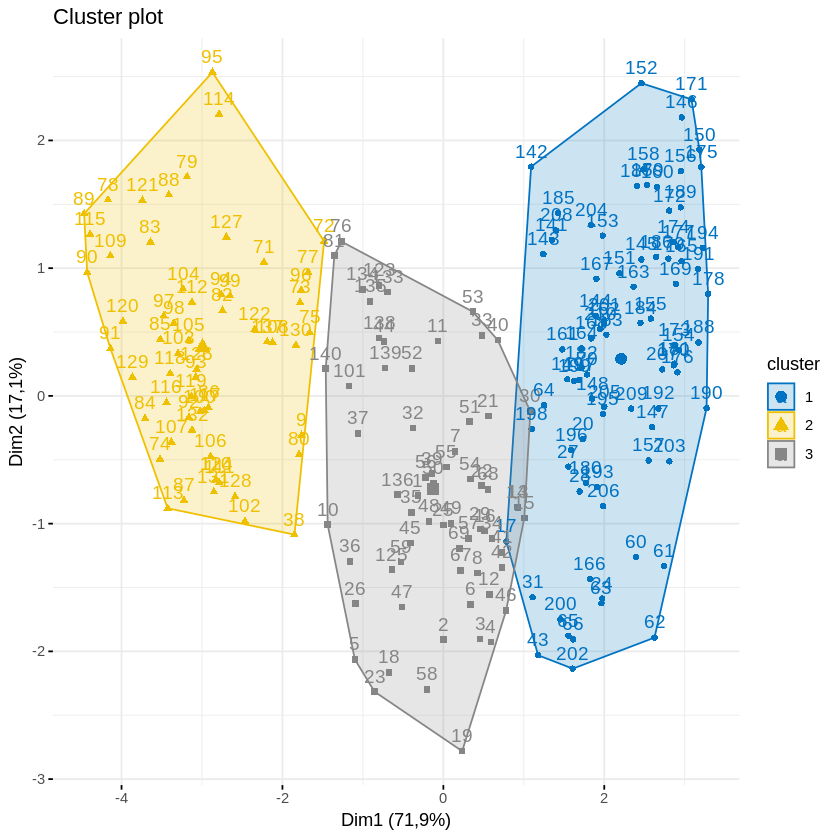

In [19]:
set.seed(99999)

dist.daisy = daisy(seeds.scaled, metric = "gower")
dis.matrix.daisy = as.matrix(dist.daisy)
km.daisy = kmeans(dis.matrix.daisy, 3)

seeds$km.daisy = km.daisy$cluster

fviz_cluster(km.daisy, data = seeds.scaled, palette = "jco", ggtheme = theme_minimal())

In [28]:
seeds

area,perimeter,compactness,length,width,AC,lengthGroove,class,km.eucl,km.daisy
"15,26","14,84","0,8710","5,763","3,312","2,2210","5,220",Kama,1,3
"14,88","14,57","0,8811","5,554","3,333","1,0180","4,956",Kama,1,3
"14,29","14,09","0,9050","5,291","3,337","2,6990","4,825",Kama,1,3
"13,84","13,94","0,8955","5,324","3,379","2,2590","4,805",Kama,1,3
"16,14","14,99","0,9034","5,658","3,562","1,3550","5,175",Kama,1,3
"14,38","14,21","0,8951","5,386","3,312","2,4620","4,956",Kama,1,3
"14,69","14,49","0,8799","5,563","3,259","3,5860","5,219",Kama,1,3
"14,11","14,10","0,8911","5,420","3,302","2,7000","5,000",Kama,1,3
"16,63","15,46","0,8747","6,053","3,465","2,0400","5,877",Kama,4,2
"16,44","15,25","0,8880","5,884","3,505","1,9690","5,533",Kama,4,3


In [29]:
summary(seeds[seeds["km.eucl"] == 1, ])

summary(seeds[seeds["km.eucl"] == 2, ])

summary(seeds[seeds["km.eucl"] == 3, ])

summary(seeds[seeds["km.eucl"] == 4, ])

      area         perimeter      compactness         length     
 Min.   :11,23   Min.   :12,63   Min.   :0,8392   Min.   :4,902  
 1st Qu.:13,16   1st Qu.:13,77   1st Qu.:0,8713   1st Qu.:5,306  
 Median :14,11   Median :14,17   Median :0,8818   Median :5,438  
 Mean   :13,95   Mean   :14,10   Mean   :0,8810   Mean   :5,426  
 3rd Qu.:14,79   3rd Qu.:14,52   3rd Qu.:0,8917   3rd Qu.:5,585  
 Max.   :16,19   Max.   :15,16   Max.   :0,9183   Max.   :5,833  
     width             AC          lengthGroove        class       km.eucl 
 Min.   :2,850   Min.   :0,7651   Min.   :4,519   Kama    :58   Min.   :1  
 1st Qu.:3,116   1st Qu.:1,7420   1st Qu.:4,849   Rosa    : 1   1st Qu.:1  
 Median :3,199   Median :2,4620   Median :5,056   Canadian: 8   Median :1  
 Mean   :3,208   Mean   :2,5932   Mean   :5,024                 Mean   :1  
 3rd Qu.:3,330   3rd Qu.:3,1780   3rd Qu.:5,176                 3rd Qu.:1  
 Max.   :3,582   Max.   :6,6850   Max.   :5,487                 Max.   :1  
    km

      area         perimeter      compactness         length     
 Min.   :17,36   Min.   :15,76   Min.   :0,8452   Min.   :5,890  
 1st Qu.:18,61   1st Qu.:16,19   1st Qu.:0,8755   1st Qu.:6,121  
 Median :18,95   Median :16,38   Median :0,8868   Median :6,247  
 Mean   :19,08   Mean   :16,45   Mean   :0,8865   Mean   :6,265  
 3rd Qu.:19,44   3rd Qu.:16,70   3rd Qu.:0,8988   3rd Qu.:6,408  
 Max.   :21,18   Max.   :17,25   Max.   :0,9108   Max.   :6,675  
     width             AC         lengthGroove        class       km.eucl 
 Min.   :3,485   Min.   :1,472   Min.   :5,750   Kama    : 0   Min.   :2  
 1st Qu.:3,685   1st Qu.:2,470   1st Qu.:5,965   Rosa    :50   1st Qu.:2  
 Median :3,772   Median :3,244   Median :6,106   Canadian: 0   Median :2  
 Mean   :3,765   Mean   :3,474   Mean   :6,123                 Mean   :2  
 3rd Qu.:3,849   3rd Qu.:4,327   3rd Qu.:6,236                 3rd Qu.:2  
 Max.   :4,033   Max.   :6,682   Max.   :6,550                 Max.   :2  
    km.daisy


      area         perimeter      compactness         length     
 Min.   :10,59   Min.   :12,41   Min.   :0,8081   Min.   :4,899  
 1st Qu.:11,24   1st Qu.:12,99   1st Qu.:0,8332   1st Qu.:5,162  
 Median :11,78   Median :13,25   Median :0,8477   Median :5,236  
 Mean   :11,82   Mean   :13,25   Mean   :0,8457   Mean   :5,241  
 3rd Qu.:12,39   3rd Qu.:13,52   3rd Qu.:0,8591   3rd Qu.:5,337  
 Max.   :13,34   Max.   :13,95   Max.   :0,8883   Max.   :5,541  
     width             AC         lengthGroove        class       km.eucl 
 Min.   :2,630   Min.   :2,221   Min.   :4,794   Kama    : 2   Min.   :3  
 1st Qu.:2,717   1st Qu.:4,125   1st Qu.:5,003   Rosa    : 0   1st Qu.:3  
 Median :2,816   Median :4,878   Median :5,112   Canadian:62   Median :3  
 Mean   :2,834   Mean   :4,954   Mean   :5,130                 Mean   :3  
 3rd Qu.:2,923   3rd Qu.:5,475   3rd Qu.:5,265                 3rd Qu.:3  
 Max.   :3,232   Max.   :8,456   Max.   :5,491                 Max.   :3  
    km.daisy


      area         perimeter      compactness         length     
 Min.   :14,49   Min.   :14,61   Min.   :0,8527   Min.   :5,477  
 1st Qu.:15,57   1st Qu.:14,94   1st Qu.:0,8644   1st Qu.:5,762  
 Median :16,23   Median :15,27   Median :0,8763   Median :5,850  
 Mean   :16,28   Mean   :15,27   Mean   :0,8768   Mean   :5,855  
 3rd Qu.:16,84   3rd Qu.:15,55   3rd Qu.:0,8866   3rd Qu.:5,927  
 Max.   :17,63   Max.   :15,91   Max.   :0,9079   Max.   :6,139  
     width             AC         lengthGroove        class       km.eucl 
 Min.   :3,113   Min.   :1,969   Min.   :5,136   Kama    :10   Min.   :4  
 1st Qu.:3,395   1st Qu.:2,956   1st Qu.:5,527   Rosa    :19   1st Qu.:4  
 Median :3,464   Median :4,004   Median :5,752   Canadian: 0   Median :4  
 Mean   :3,440   Mean   :3,880   Mean   :5,677                 Mean   :4  
 3rd Qu.:3,486   3rd Qu.:4,543   3rd Qu.:5,877                 3rd Qu.:4  
 Max.   :3,690   Max.   :5,593   Max.   :5,967                 Max.   :4  
    km.daisy 